📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event        1219 non-null   object        
 1   site         1219 non-null   object        
 2   date         1219 non-null   object        
 3   white        1219 non-null   object        
 4   black        1219 non-null   object        
 5   result       1219 non-null   object        
 6   gameid       1219 non-null   object        
 7   utcdate      1219 non-null   datetime64[ns]
 8   utctime      1219 non-null   object        
 9   whiteelo     1219 non-null   int64         
 10  blackelo     1214 non-null   float64       
 11  variant      1219 non-null   object        
 12  timecontrol  1219 non-null   object        
 13  eco          1219 non-null   object        
 14  termination  1219 non-null   object        
 15  moves        1212 non-null   object    

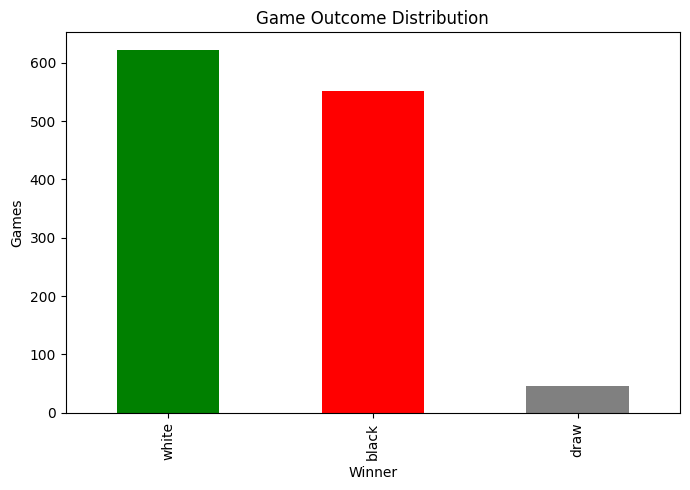

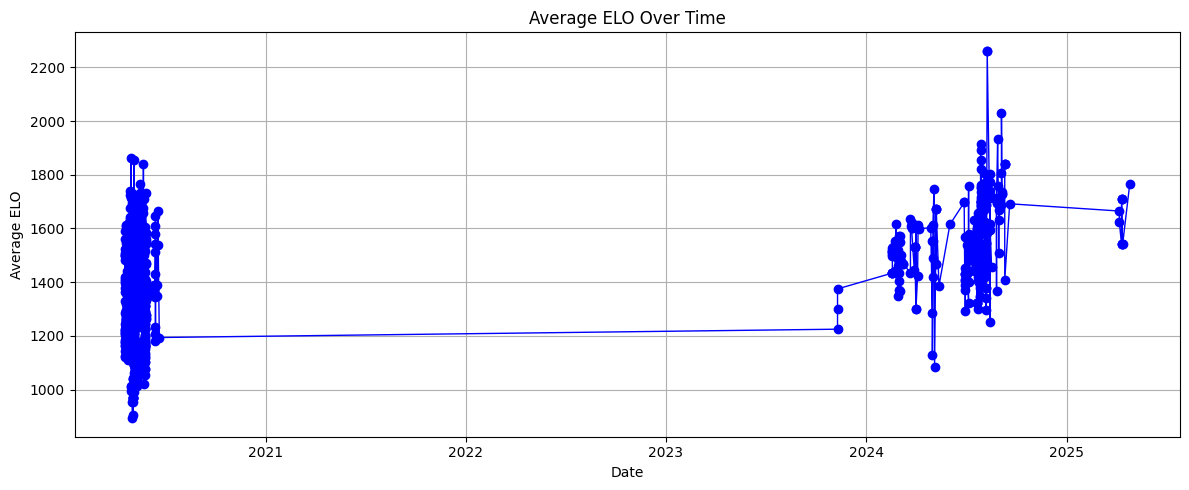


🏁 Termination Status:
 termination
Normal          909
Time forfeit    296
Abandoned        14
Name: count, dtype: int64


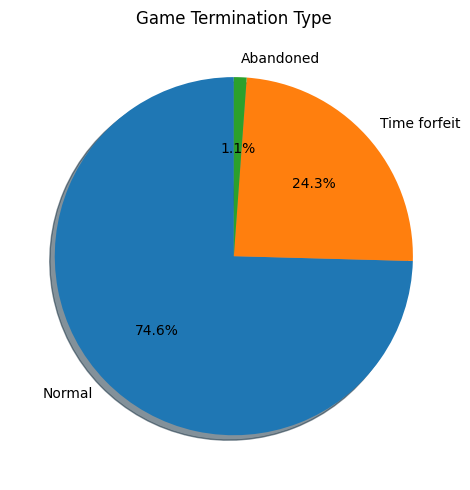

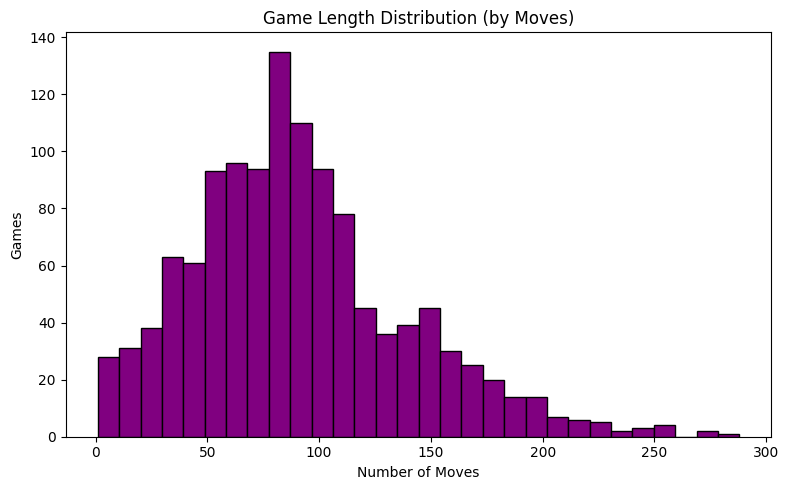


♟️ Top ECO Codes:
 eco
C50    181
D00     59
B01     55
C20     47
C44     46
A00     45
C40     45
B00     43
C57     38
D02     33
Name: count, dtype: int64


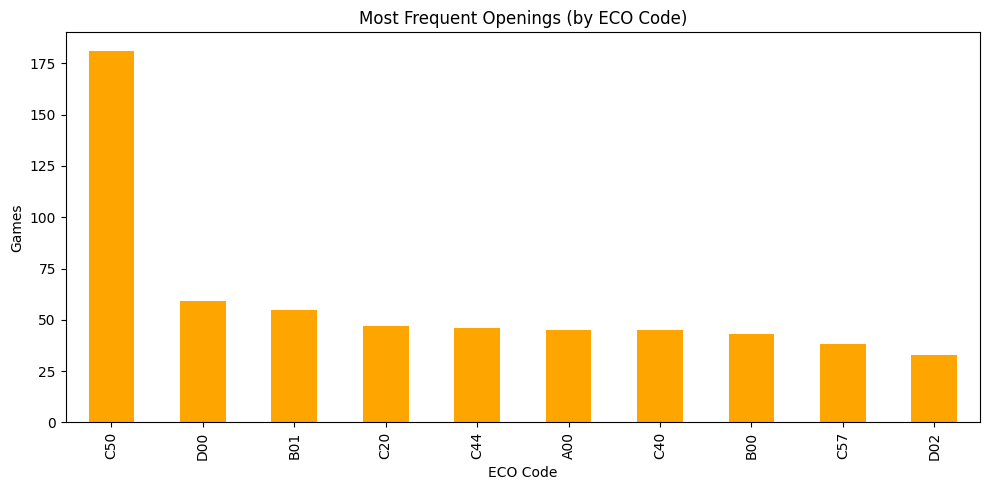

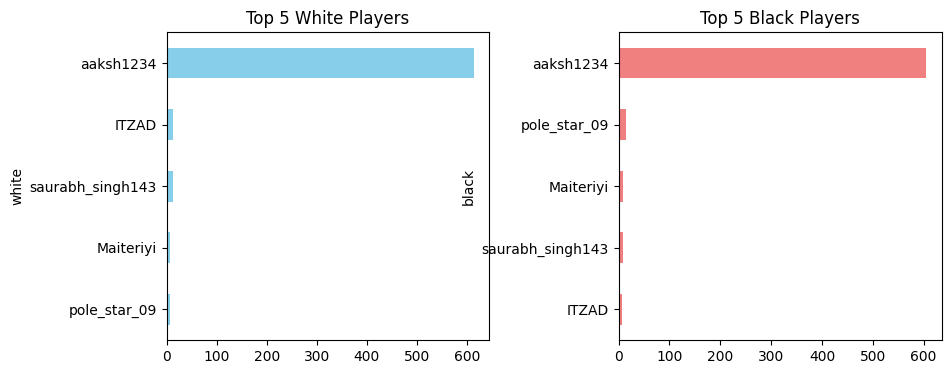

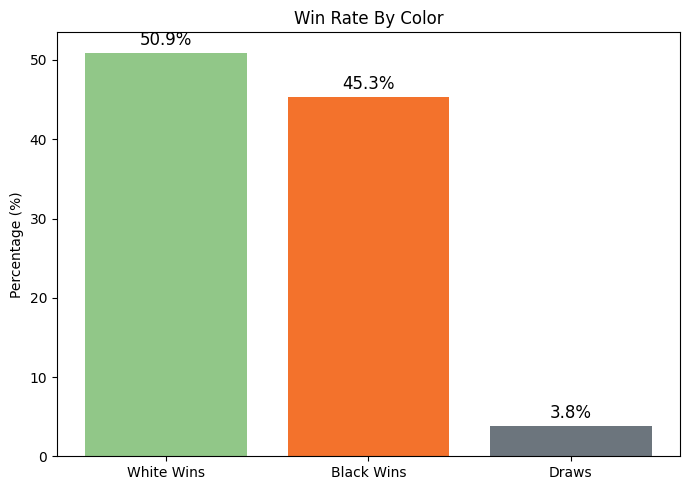


⏱️ Time Control Frequencies:
 timecontrol
180+0     348
60+0      132
300+0     118
180+2      93
300+3      90
300+2      81
600+0      79
120+1      38
600+10     37
15+0       22
Name: count, dtype: int64


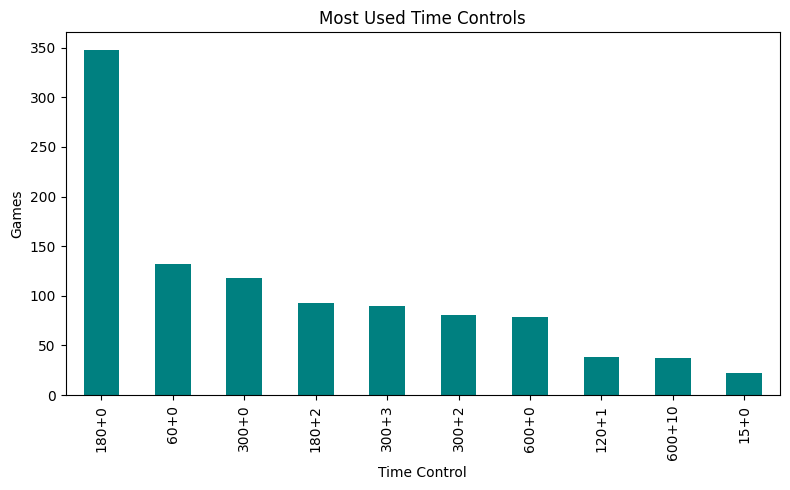


📈 Correlation Matrix:
            whiteelo  blackelo   avg_elo  num_moves
whiteelo   1.000000  0.358828  0.816230   0.113922
blackelo   0.358828  1.000000  0.832137   0.141062
avg_elo    0.816230  0.832137  1.000000   0.154963
num_moves  0.113922  0.141062  0.154963   1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16012\3843145057.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


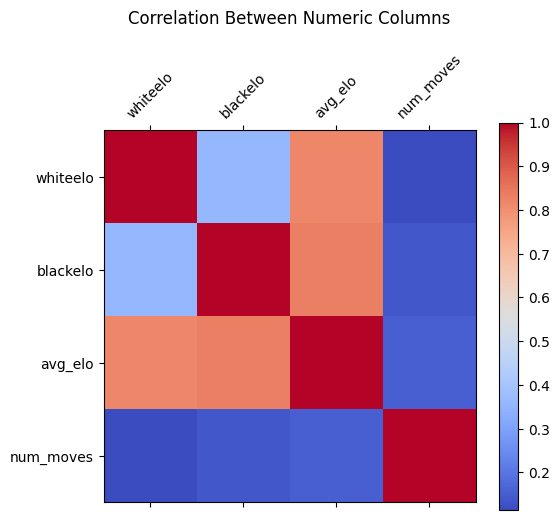

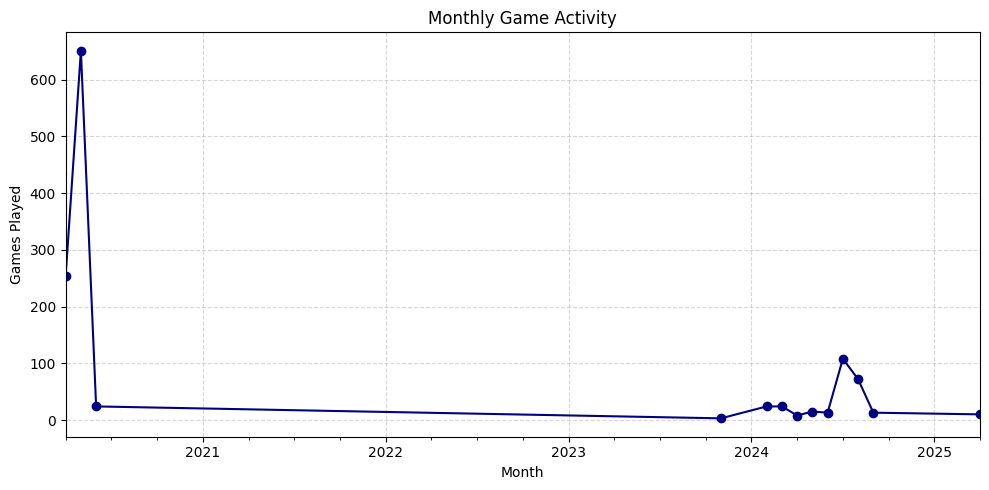

In [1]:
# Lichess Chess Data Analysis Project
# Libraries: Python, Pandas, NumPy, Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# === Load Dataset ===
file_path = "games.csv"  # Update this if your file name is different
df = pd.read_csv(file_path)



# === Clean and Prepare Data ===
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



# Parse result column into winner
def get_winner(result):
    if result == '1-0':
        return 'white'
    elif result == '0-1':
        return 'black'
    else:
        return 'draw'
    


df['winner'] = df['result'].apply(get_winner)
df['utcdate'] = pd.to_datetime(df['utcdate'], errors='coerce')



# Convert Elo columns to numeric
df['whiteelo'] = pd.to_numeric(df['whiteelo'], errors='coerce')
df['blackelo'] = pd.to_numeric(df['blackelo'], errors='coerce')



# Add computed columns
df['avg_elo'] = (df['whiteelo'] + df['blackelo']) // 2
df['num_moves'] = df['moves'].apply(lambda x: len(str(x).strip().split()))



# === General Info ===
print("📊 Dataset Info:")
print(df.info())
print("\n🔍 Sample Rows:")
print(df.head())



# === 1. Game Outcome Analysis ===
outcomes = df['winner'].value_counts()
print("\n🎯 Game Outcomes:\n", outcomes)

plt.figure(figsize=(7,5))
outcomes.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Game Outcome Distribution')
plt.xlabel('Winner')
plt.ylabel('Games')
plt.tight_layout()
plt.show()



# === 2. Rating Trend Over Time ===
df_sorted = df.sort_values('utcdate')
plt.figure(figsize=(12,5))
plt.plot(df_sorted['utcdate'], df_sorted['avg_elo'], marker='o', color='blue', linewidth=1)
plt.title('Average ELO Over Time')
plt.xlabel('Date')
plt.ylabel('Average ELO')
plt.grid(True)
plt.tight_layout()
plt.show()



# === 3. Game Termination Analysis ===
termination_counts = df['termination'].value_counts()
print("\n🏁 Termination Status:\n", termination_counts)

plt.figure(figsize=(7,5))
termination_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Game Termination Type')
plt.ylabel('')
plt.tight_layout()
plt.show()



# === 4. Game Length Analysis ===
plt.figure(figsize=(8,5))
plt.hist(df['num_moves'], bins=30, color='purple', edgecolor='black')
plt.title('Game Length Distribution (by Moves)')
plt.xlabel('Number of Moves')
plt.ylabel('Games')
plt.tight_layout()
plt.show()



# === 5. Most Used Openings by ECO Code ===
eco_counts = df['eco'].value_counts().head(10)
print("\n♟️ Top ECO Codes:\n", eco_counts)

plt.figure(figsize=(10,5))
eco_counts.plot(kind='bar', color='orange')
plt.title('Most Frequent Openings (by ECO Code)')
plt.xlabel('ECO Code')
plt.ylabel('Games')
plt.tight_layout()
plt.show()



# === 6. Top Players by Appearances (Fixed version using subplots) ===
top_white_players = df['white'].value_counts().head(5)
top_black_players = df['black'].value_counts().head(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

top_white_players.plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_title('Top 5 White Players')
ax1.invert_yaxis()

top_black_players.plot(kind='barh', color='lightcoral', ax=ax2)
ax2.set_title('Top 5 Black Players')
ax2.invert_yaxis()

plt.subplots_adjust(wspace=0.4)  # Adjust horizontal spacing
plt.show()



# === 7. Win Rate by Color ===
win_white = len(df[df['winner'] == 'white'])
win_black = len(df[df['winner'] == 'black'])
draws = len(df[df['winner'] == 'draw'])
total_games = len(df)

colors = ['White Wins', 'Black Wins', 'Draws']
counts = [win_white, win_black, draws]
percentages = np.array(counts) / total_games * 100

plt.figure(figsize=(7,5))
plt.bar(colors, percentages, color=['#91C788', '#F3722C', '#6C757D'])
plt.title("Win Rate By Color")
plt.ylabel("Percentage (%)")
for i, val in enumerate(percentages):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center', fontsize=12)
plt.tight_layout()
plt.show()



# === 8. Time Control Format Analysis ===
time_controls = df['timecontrol'].value_counts().head(10)
print("\n⏱️ Time Control Frequencies:\n", time_controls)

plt.figure(figsize=(8,5))
time_controls.plot(kind='bar', color='teal')
plt.title('Most Used Time Controls')
plt.xlabel('Time Control')
plt.ylabel('Games')
plt.tight_layout()
plt.show()



# === 9. Correlation Matrix ===
numeric_cols = ['whiteelo', 'blackelo', 'avg_elo', 'num_moves']
corr_matrix = df[numeric_cols].corr()
print("\n📈 Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(6,5))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title("Correlation Between Numeric Columns", pad=20)
plt.tight_layout()
plt.show()



# === 10. Monthly Game Count Trend ===
df['month'] = df['utcdate'].dt.to_period('M')
monthly_games = df.groupby('month').size()

plt.figure(figsize=(10,5))
monthly_games.plot(marker='o', color='navy')
plt.title('Monthly Game Activity')
plt.xlabel('Month')
plt.ylabel('Games Played')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
